In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [7]:
X=np.load('X.npy')
Y=np.load('Y.npy')
X.shape

(2062, 64, 64)

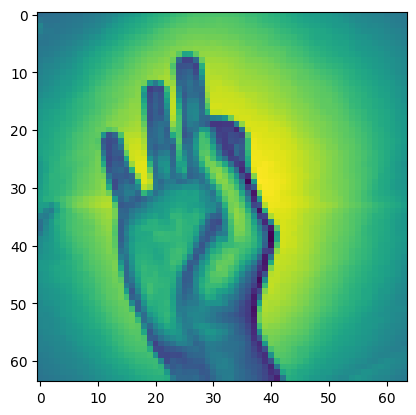

In [8]:
plt.imshow(X[0])

In [9]:
9- np.argmax(Y[0])

9

In [10]:
X_flat = np.array(X).reshape((2062, 64*64))
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20), random_state=1)

In [11]:
y_hat = clf.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.3392568659127625


In [12]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d =np.argmax(cumsum >= 0.95) + 1
d

292

In [13]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


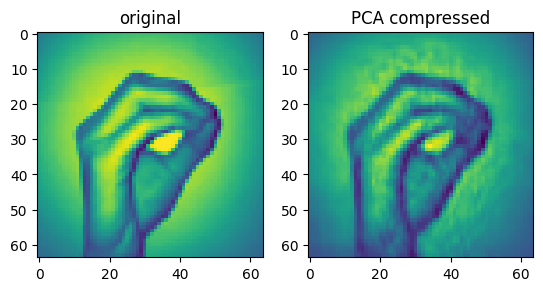

In [14]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)
plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

In [15]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
clf_reduced.fit(X_reduced, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20))

In [16]:
X_test_reduced = pca.transform(X_test)
y_hat_reduced = clf_reduced.predict(X_test_reduced)
print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.654281098546042
